# Introduction to sklearn 

Useful functions :

0. An end to end Scikit-learn workflow
1. Getting the data ready
2. Choose the right estimator/algo for our problem
3. Fit the model/algo and use it to make predictions
4. Evaluating the model
5. Improve the model
6. Save and load a trained model
7. Puttting it all together

## 0. An end to end Scikit-learn workflow

In [1]:
import numpy as np

In [2]:
#Get the data ready
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
heart = pd.read_csv("data/heart-disease.csv")
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
import warnings 
warnings.filterwarnings("ignore")

In [4]:
# Create X (features matrix)
X = heart.drop("target", axis=1)

#Create Y (labels)
y = heart["target"]

In [5]:
# 2. Choose the right model and hyperparamters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# we keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# 3. Fit the model to the data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
clf.fit(X_train, y_train);

In [9]:
# make a prediction
# y_label =clf.predict(np.array([0, 2, 3, 4]))

In [10]:
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [11]:
y_test

231    0
162    1
153    1
106    1
41     1
      ..
61     1
133    1
271    0
66     1
158    1
Name: target, Length: 61, dtype: int64

In [12]:
# 4 .Evaluate the model 
clf.score(X_train, y_train)

1.0

In [13]:
clf.score(X_test, y_test)

0.8688524590163934

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.90      0.76      0.83        25
           1       0.85      0.94      0.89        36

    accuracy                           0.87        61
   macro avg       0.88      0.85      0.86        61
weighted avg       0.87      0.87      0.87        61



In [15]:
confusion_matrix(y_test, y_preds)

array([[19,  6],
       [ 2, 34]], dtype=int64)

In [16]:
accuracy_score(y_test, y_preds)

0.8688524590163934

In [17]:
# 5 .Improve the model
# Try diff ammounts of estimator

np.random.seed(42)
for i in range (10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print(" ")

Trying model with 10 estimators...
Model accuracy on test set: 83.61%
 
Trying model with 20 estimators...
Model accuracy on test set: 81.97%
 
Trying model with 30 estimators...
Model accuracy on test set: 83.61%
 
Trying model with 40 estimators...
Model accuracy on test set: 81.97%
 
Trying model with 50 estimators...
Model accuracy on test set: 86.89%
 
Trying model with 60 estimators...
Model accuracy on test set: 85.25%
 
Trying model with 70 estimators...
Model accuracy on test set: 85.25%
 
Trying model with 80 estimators...
Model accuracy on test set: 85.25%
 
Trying model with 90 estimators...
Model accuracy on test set: 83.61%
 


In [18]:
# 6. Save the model and load it 
import pickle

pickle.dump(clf, open("randomForestModel_1.pk1", "wb"))

In [19]:
loadedModel = pickle.load(open("randomForestModel_1.pk1", "rb"))
loadedModel.score(X_test, y_test)

0.8360655737704918

## 1. Getting data ready

The main things to do:
 1. Split the data into features and labels (usually 'X' & 'y')
 2. Filling/Imputing missing values
 3. Convert non numerical values to numeric(encoding)

In [20]:
heart.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [21]:
X = heart.drop("target", axis=1)
X.head(3)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2


In [22]:
y = heart["target"]
y.head(3)

0    1
1    1
2    1
Name: target, dtype: int64

In [23]:
# Split the data to training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

## Make it Numerical

In [25]:
carSales = pd.read_csv("data/car-sales-extended.csv")
carSales.head(3)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343


In [26]:
carSales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [27]:
#split the data 
X = carSales.drop("Price", axis=1 )
y = carSales["Price"]

# Split to training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
# from sklearn.ensemble import RandomForestRegressor

# model =RandomForestRegressor()
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

In [30]:
# turn the categories into  numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categoricalFeatures = ["Make", "Colour", "Doors"]
OneHot = OneHotEncoder()
tranformer = ColumnTransformer([("OneHot", 
                                OneHot, 
                                categoricalFeatures)],
                                remainder="passthrough")
tranformedX = tranformer.fit_transform(X)
tranformedX

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [31]:
pd.DataFrame(tranformedX)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [32]:
X.head(5)

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [33]:
dummy = pd.get_dummies(carSales[["Make", "Colour", "Doors"]])
dummy

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [34]:
# lets refil the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(tranformedX, y, test_size=0.2)
model.fit(X_train, y_train);

In [35]:
model.score(X_test, y_test)

0.3235867221569877

### Missing Values

1. Fill them with some values
2. Remove the sample with missing data together

In [36]:
carMiss = pd.read_csv("data/car-sales-extended-missing-data.csv")
carMiss.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [37]:
#create x and y
X = carMiss.drop("Price", axis=1)
y = carMiss["Price"]

In [38]:
# Lets convert our data to numbers
# turn the categories into  numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categoricalFeatures = ["Make", "Colour", "Doors"]
OneHot = OneHotEncoder()
tranformer = ColumnTransformer([("OneHot", 
                                OneHot, 
                                categoricalFeatures)],
                                remainder="passthrough")
tranformedX = tranformer.fit_transform(X)
tranformedX

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4000 stored elements and shape (1000, 16)>

In [39]:
carMiss

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


#### Fill missing data with pandas

In [40]:
carMiss["Doors"].value_counts()

Doors
4.0    811
5.0     75
3.0     64
Name: count, dtype: int64

In [41]:
# Fil the make column
carMiss["Make"].fillna("missing", inplace=True)
carMiss["Colour"].fillna("missing", inplace=True)

carMiss["Odometer (KM)"].fillna(carMiss["Odometer (KM)"].mean(), inplace=True)

carMiss["Doors"].fillna(4, inplace=True)

In [42]:
carMiss.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [43]:
#Remove rows with missing price values
carMiss.dropna(inplace=True)
carMiss.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [44]:
X = carMiss.drop("Price", axis=1)
y = carMiss["Price"]

In [45]:
# turn the categories into  numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categoricalFeatures = ["Make", "Colour", "Doors"]
OneHot = OneHotEncoder()
tranformer = ColumnTransformer([("OneHot", 
                                OneHot, 
                                categoricalFeatures)],
                                remainder="passthrough")
tranformedX = tranformer.fit_transform(carMiss)
tranformedX

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Fill missing values with scikitLearn

In [46]:
carMiss = pd.read_csv("data/car-sales-extended-missing-data.csv")
carMiss.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [47]:
#Drop rows with no label
carMiss.dropna(subset=["Price"], inplace=True)
carMiss.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [48]:
X = carMiss.drop("Price", axis=1)
y = carMiss["Price"]

In [49]:
# Fill missing values with Scikitlearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill missing values with missng and numerical value with mean
catImputer = SimpleImputer(strategy="constant", fill_value="missing")
doorImputer = SimpleImputer(strategy="constant", fill_value=4)
numImputer = SimpleImputer(strategy="mean")

#Define columns
catFeature = ["Make", "Colour"]
doorFeature = ["Doors"]
numFeature = ["Odometer (KM)"]

# Create and Imputer(sth that fills the missing dta)
imputer = ColumnTransformer([("catImputer", catImputer, catFeature),
                             ("doorImputer", doorImputer, doorFeature),
                             ("numImputer", numImputer, numFeature)])

# Transform the data
filledX = imputer.fit_transform(X)
filledX

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [50]:
carSalesFilled = pd.DataFrame(filledX, 
                              columns=["Make", "Colour", "Doors", "Odometer (KM)"])
carSalesFilled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [51]:
carSalesFilled.isna().sum(), carSalesFilled.dtypes

(Make             0
 Colour           0
 Doors            0
 Odometer (KM)    0
 dtype: int64,
 Make             object
 Colour           object
 Doors            object
 Odometer (KM)    object
 dtype: object)

In [52]:
# turn the categories into  numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categoricalFeatures = ["Make", "Colour", "Doors"]
OneHot = OneHotEncoder()
tranformer = ColumnTransformer([("OneHot", 
                                OneHot, 
                                categoricalFeatures)],
                                remainder="passthrough")
transformedX = tranformer.fit_transform(carSalesFilled)
transformedX

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3800 stored elements and shape (950, 15)>

In [53]:
print(pd.DataFrame(tranformedX).head())

    0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
1  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
2  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
3  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
4  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   

         14       15  
0   35431.0  15323.0  
1  192714.0  19943.0  
2   84714.0  28343.0  
3  154365.0  13434.0  
4  181577.0  14043.0  


In [54]:
# Now we have got our data as numbers and filled(no missing values)
# Let's fit model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformedX, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

In [55]:
len(carSalesFilled), len(carSales)

(950, 1000)

## Choosing the right Estimator/algorithm for ut ptoblem
Some things to note:
* Sklearn refers to machine learning models, algorithms as estimators
* Classification problem predicting a category (heart disease or not)
   * Sometimes you will see clf (short for classifier) used as a classification estimator
* Regression problem - predicting a number (selling price of a car)

### Picking a machine learning model for regression problem
lets use the Carlifornia Housing data sets

In [56]:
# Getting the California Housing datasets
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [57]:
housingDf = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housingDf

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [58]:
housingDf["MedHouseVal"] = housing["target"]
housingDf

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [59]:
housingDf["target"] = housing["target"]
housingDf

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,0.847


In [60]:
housingDf = housingDf.drop("MedHouseVal", axis=1)

In [61]:
housingDf

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [62]:
# Import algorithm 
from sklearn.linear_model import Ridge

# set up random seed
np.random.seed(42)

# create the data
X = housingDf.drop("target", axis=1)
y = housingDf["target"]

#split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

# Lasso = 0.2841671821008396
# ElasticNet = 0.41655189098028245
# SVR(kernel="linear") = -0.01648536010717372
# EnsembleRegressors = 0.9345833333333333
    # RandomForest = 0.8065734772187598
# SVR(kernel="rbf") = -0.01648536010717372

0.5758549611440125

## Picking Machine Learning Model for Classification

In [63]:
# Using SVM 
from sklearn import svm

# set up random seed
np.random.seed(42)

# create the data
X = housingDf.drop("target", axis=1)
y = housingDf["target"]

#split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate and fit the model (on the training set)
model = svm.SVR(kernel="rbf")
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

-0.01648536010717372

In [64]:
# Using Ensemble Model (Combination of smaller models to try and make better prediction than just a single model )

from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.datasets import make_hastie_10_2

# set up random seed
np.random.seed(42)

# create the data
# X = housingDf.drop("target", axis=1)
# y = housingDf["target"]

X, y = make_hastie_10_2(random_state=0)

#split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate and fit the model (on the training set)
# model = svm.SVR()
model = HistGradientBoostingClassifier().fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)


0.9345833333333333

In [65]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housingDf.drop("target", axis=1)
y = housingDf["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8065734772187598

## Choosing an estimatore for Classification problem

In [66]:
HeartDisease = pd.read_csv("data/heart-disease.csv")
HeartDisease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Tidbit:
     1. If you have structured data, use ensembles methods
     2. If you have unstructured data, use deep learning ot transfer learning 

After consulting the map it says import linear svc 

In [67]:
# Import Linear Svc
from sklearn.svm import LinearSVC

np.random.seed(42)

X = HeartDisease.drop("target", axis=1)
y = HeartDisease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instatiate LinearSVC
clf = LinearSVC()

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8688524590163934

In [68]:
HeartDisease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [69]:
# Import RandomForestClassifier estimatore class 
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = HeartDisease.drop("target", axis=1)
y = HeartDisease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instatiate RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8524590163934426

## 3. Fit the model/algo and use it to make predictions

### 3.1 Fitting model to the data

* `X` = features, features variables, data
* `y` = labels, targets, targets variables

In [70]:
# Import RandomForestClassifier estimatore class 
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = HeartDisease.drop("target", axis=1)
y = HeartDisease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instatiate RandomForestClassifier
clf = RandomForestClassifier()

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

# Evaluate the random forest classifier (use the patterns the model has learned)
clf.score(X_test, y_test)

0.8524590163934426

In [71]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [72]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [73]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


### 3.2 Make prediction using MLM

2 ways to make predictions:
 1. `predict()`
 2. `predict_proba()`

In [74]:
# Use a trained model to make predictions
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [75]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [76]:
# Compare predictions to ruth labels to evaluate the model

y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [77]:
clf.score(X_test, y_test)

0.8524590163934426

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

 Make predictions with `predict_praba()`



In [79]:
# predict_proba() returns probabilities of a classification method
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [80]:
# Lets predict on the same data 
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

`predict()` can also be used i regression models

In [81]:
housingDf.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [82]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X = housingDf.drop("target", axis=1)
y = housingDf["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)

y_preds = model.predict(X_test)
# model.score(X_test, y_test)

In [83]:
y_preds[:5]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  ])

In [84]:
np.array(y_test[:5])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   ])

In [85]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error( y_test, y_preds)

0.32659871732073664

## 4. Evaluating a MLM

3 ways to evaluate :
1. Estimators built in `score()` method
2. The `scoring` parameter
3. Problem-specific metric function

### 4.1 Evaluating with `score()` method

In [86]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X = HeartDisease.drop("target", axis=1)
y = HeartDisease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.8524590163934426

In [87]:
clf.score(X_train, y_train)

1.0

Lets use the `score()` on our regression problemm...

In [88]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X = HeartDisease.drop("target", axis=1)
y = HeartDisease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)

model.fit(X_train, y_train)

RandomForestRegressor()

In [89]:
model.score(X_test, y_test)

0.5106393318965518

In [90]:
housingDf.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [91]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

### 4.1 Evaluating with `scoring()` method

In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = HeartDisease.drop("target", axis=1)
y = HeartDisease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

In [93]:
clf.score(X_test, y_test)

0.8524590163934426

In [94]:
# Model is trained on 5 diff versions of training data, and evaluated on  diff versions of test data
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.76666667, 0.7       , 0.83333333, 0.73333333, 0.8       ])

In [95]:
np.random.seed(42)

ClfSingleScore = clf.score(X_test, y_test)

ClfCrossValScrore = np.mean(cross_val_score(clf, X, y))

ClfSingleScore, ClfCrossValScrore

(0.8524590163934426, 0.8248087431693989)

In [96]:
# Scoring parameter is set to none by default
cross_val_score(clf, X, y, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

###  4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification Report

* Accuracy

In [97]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = HeartDisease.drop("target", axis=1)
y = HeartDisease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

CrossValScore = cross_val_score(clf, X, y)

In [98]:
np.mean(CrossValScore)

0.8215300546448088

In [99]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(CrossValScore) *100: .2f}%")

Heart Disease Classifier Cross-Validated Accuracy:  82.15%


* Area under Receiver Operating Characteristic (ROC/AUC) curve

 ROC curves are a comparison of a models true positive rate (tpr) verses a model false positive rate (fpr)

 * True positive = model predicts 1 when truth is 1
 * False positive = model predicts 1 when true is 0
 * True negative = model predicts 0 when truth is 0
 * False negative = model predict 0 when truth is 1

In [100]:
# Create X_test .....etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [101]:
from sklearn.metrics import roc_curve

clf.fit(X_train, y_train)

y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.89, 0.11],
       [0.05, 0.95],
       [0.1 , 0.9 ],
       [0.79, 0.21],
       [0.09, 0.91],
       [0.02, 0.98],
       [0.76, 0.24],
       [0.19, 0.81],
       [0.62, 0.38],
       [0.99, 0.01]])

In [102]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.11, 0.95, 0.9 , 0.21, 0.91, 0.98, 0.24, 0.81, 0.38, 0.01])

In [103]:
# calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# check the false positive 
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03846154,
       0.03846154, 0.03846154, 0.03846154, 0.11538462, 0.11538462,
       0.15384615, 0.15384615, 0.19230769, 0.19230769, 0.23076923,
       0.26923077, 0.26923077, 0.30769231, 0.34615385, 0.5       ,
       0.69230769, 0.73076923, 0.76923077, 0.84615385, 1.        ])

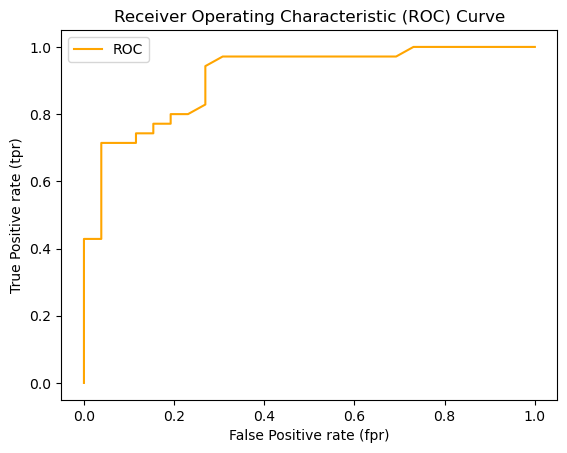

In [104]:
# creating a fn for plotting roc curves
import matplotlib.pyplot as plt

def PlotRocCurve(fpr, tpr):
    '''
    Plots a ROC curve given the false positive rate (fpr) 
    and true positive rate (tpr) of a model
    '''
    # Plot the roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")

    # Plot line with no predictive power (baseline)
    # plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guesing")

    plt.xlabel("False Positive rate (fpr)")
    plt.ylabel("True Positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

PlotRocCurve(fpr, tpr)

In [105]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9093406593406593

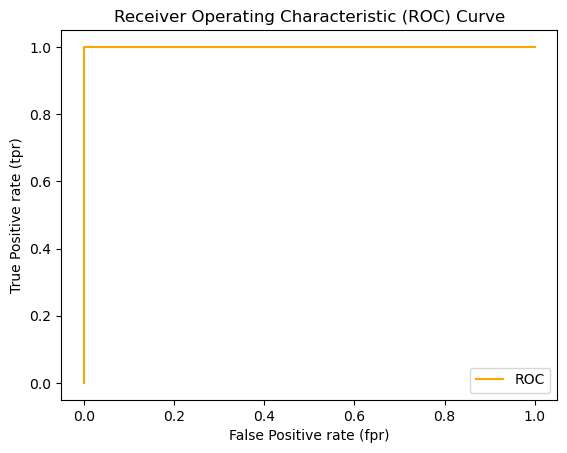

In [106]:
# Plot perfect Roc curve and auc score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
PlotRocCurve(fpr, tpr)

In [107]:
roc_auc_score(y_test, y_test)

1.0

* Confusion Matrx